In [1]:
NEED_TO_INSTALL_PACKAGES = True
if NEED_TO_INSTALL_PACKAGES:
    ! pip install bilby  lalsuite #lalsimulation
import bilby

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.9/983.9 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.2/108.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.1 MB/s eta 0:00:00
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp311-cp311-linux_x86_64.whl size=102029 sha256=becbabcafeddd1d150f5ee5a8423b198af06f6f9bd52fb3a576831e48c871bd1
  Stored in directory: /root/.cache/pip/wheels/02/2b/93/c2ee2b6f4ea9572ee4f5ade0115c4bd0887be6228328740dae
Successfully built ligo-segments


In [2]:
from bilby.gw import conversion

#calculate the chirp mass from the component masses
chirp_mass = conversion.component_masses_to_chirp_mass(mass_1=34.615, mass_2=9.545)
print(chirp_mass)

15.220129522101399


In [3]:
POSSIBLE_KEYS = bilby.gw.prior.BBHPriorDict(aligned_spin=True).keys()
print(POSSIBLE_KEYS)

10:45 bilby INFO    : Using aligned spin prior
10:45 bilby INFO    : No prior given, using default BBH priors in /usr/local/lib/python3.11/dist-packages/bilby/gw/prior_files/aligned_spins_bbh.prior.


dict_keys(['mass_1', 'mass_2', 'mass_ratio', 'chirp_mass', 'luminosity_distance', 'dec', 'ra', 'theta_jn', 'psi', 'phase', 'chi_1', 'chi_2'])


In [4]:
### LET US SETUP SOME INJECTION PARAMETERS
injection_parameters = dict(
    mass_1 = 34.615,
    mass_2 = 9.545,
    mass_ratio = 0.27574750830564784053156146179402, #m2/m1
    chirp_mass = 15.220129522101399,
    chi_1 = 0.44,
    chi_2 = 0.3,
    luminosity_distance = 740,
    theta_jn = 0.71,
    psi = 2.0,
    ra = 1.375,
    dec = -0.7,
    phase = 1.2,
    geocent_time = 1239082262.2,
)

In [5]:
waveform_arguments = dict(
    waveform_approximant = 'IMRPhenomPv2',
    reference_frequency = 50,
    minimum_frequency = 20,
    sampling_frequency = 1024,
    duration = 14,
    start_time = injection_parameters['geocent_time'] - 10,
)

In [6]:
waveform_generator = bilby.gw.WaveformGenerator(
    duration = waveform_arguments['duration'],
    sampling_frequency = waveform_arguments['sampling_frequency'],
    frequency_domain_source_model = bilby.gw.source.lal_binary_black_hole,
    parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments = waveform_arguments,
)

10:46 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


/usr/local/lib/python3.11/dist-packages/lalsimulation/lalsimulation.py:8: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal
10:46 bilby WARNING : There are unused waveform kwargs. This is deprecated behavior and will
result in an error in future releases. Make sure all of the waveform kwargs are correctly
spelled.

Unused waveform_kwargs: {'sampling_frequency': 1024, 'duration': 14, 'start_time': 1239082252.2}



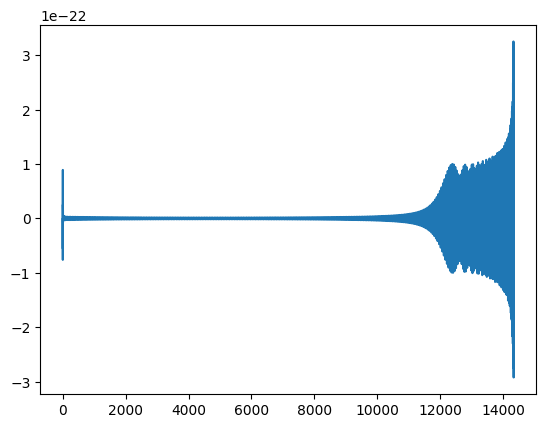

In [7]:
import matplotlib.pyplot as plt
plt.plot(waveform_generator.time_domain_strain(injection_parameters)['plus'])

In [8]:
ifos = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])
ifos_00 = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])

ifos.set_strain_data_from_power_spectral_densities(sampling_frequency=waveform_arguments['sampling_frequency'],
                                                   duration=waveform_arguments['duration'],
                                                   start_time=waveform_arguments['start_time'])

ifos_00.set_strain_data_from_zero_noise(sampling_frequency=waveform_arguments['sampling_frequency'],
                                        duration=waveform_arguments['duration'],
                                        start_time=waveform_arguments['start_time'])

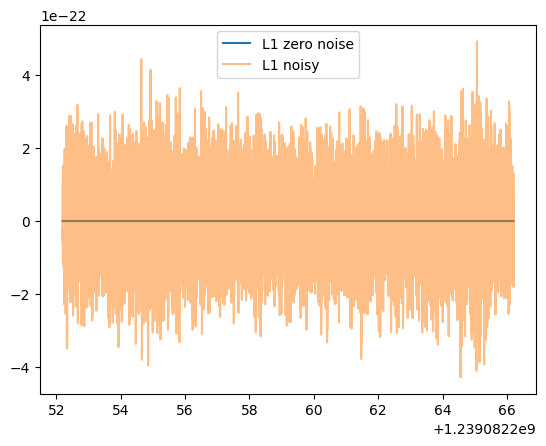

In [9]:
plt.plot(ifos_00[1].time_array, ifos_00[1].time_domain_strain, label='L1 zero noise')
plt.plot(ifos[1].time_array, ifos[1].time_domain_strain, label='L1 noisy', alpha=0.5)
plt.legend()

In [10]:
ifos.inject_signal(
    parameters=injection_parameters,
    waveform_generator=waveform_generator,
)

ifos_00.inject_signal(
    parameters=injection_parameters,
    waveform_generator=waveform_generator,
)

10:46 bilby WARNING : There are unused waveform kwargs. This is deprecated behavior and will
result in an error in future releases. Make sure all of the waveform kwargs are correctly
spelled.

Unused waveform_kwargs: {'sampling_frequency': 1024, 'duration': 14, 'start_time': 1239082252.2}

10:46 bilby INFO    : Injected signal in H1:
10:46 bilby INFO    :   optimal SNR = 14.52
10:46 bilby INFO    :   matched filter SNR = 12.48-1.28j
10:46 bilby INFO    :   mass_1 = 34.615
10:46 bilby INFO    :   mass_2 = 9.545
10:46 bilby INFO    :   mass_ratio = 0.2757475083056478
10:46 bilby INFO    :   chirp_mass = 15.220129522101399
10:46 bilby INFO    :   chi_1 = 0.44
10:46 bilby INFO    :   chi_2 = 0.3
10:46 bilby INFO    :   luminosity_distance = 740
10:46 bilby INFO    :   theta_jn = 0.71
10:46 bilby INFO    :   psi = 2.0
10:46 bilby INFO    :   ra = 1.375
10:46 bilby INFO    :   dec = -0.7
10:46 bilby INFO    :   phase = 1.2
10:46 bilby INFO    :   geocent_time = 1239082262.2
10:46 bilby INFO 

[{'plus': array([ 0.00000000e+00-0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
          0.00000000e+00-0.00000000e+00j, ...,
         -5.02326680e-26+1.96509451e-26j, -5.01534359e-26+1.95819160e-26j,
          0.00000000e+00-0.00000000e+00j]),
  'cross': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.89224902e-26+4.83705572e-26j, 1.88560199e-26+4.82942622e-26j,
         0.00000000e+00+0.00000000e+00j])},
 {'plus': array([ 0.00000000e+00-0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
          0.00000000e+00-0.00000000e+00j, ...,
         -5.02326680e-26+1.96509451e-26j, -5.01534359e-26+1.95819160e-26j,
          0.00000000e+00-0.00000000e+00j]),
  'cross': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.89224902e-26+4.83705572e-26j, 1.88560199e-26+4.82942622e-26j,
         0.00000000e+00+0.00000000e+00j])},
 {'plus': ar

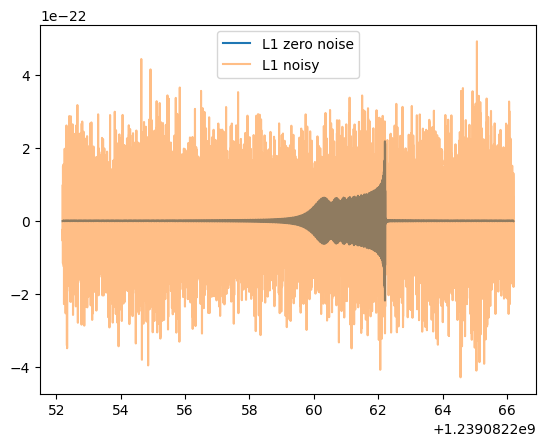

In [11]:
plt.plot(ifos_00[1].time_array, ifos_00[1].time_domain_strain, label='L1 zero noise')
plt.plot(ifos[1].time_array, ifos[1].time_domain_strain, label='L1 noisy', alpha=0.5)
plt.legend()

$p(\theta|d) = \dfrac{\mathcal{L}(d|\theta) p(\theta)}{\mathcal{Z(d)}}$

In [12]:
priors = bilby.gw.prior.BBHPriorDict(aligned_spin=True)
priors['mass_1'] = bilby.core.prior.Uniform(name='mass_1', minimum=5, maximum=50, unit=None)
priors['mass_2'] = bilby.core.prior.Uniform(name='mass_2', minimum=5, maximum=50, unit=None)
pop_keys = ["mass_ratio", "chirp_mass"]
for key in pop_keys:
    priors.pop(key)
priors

10:46 bilby INFO    : Using aligned spin prior
10:46 bilby INFO    : No prior given, using default BBH priors in /usr/local/lib/python3.11/dist-packages/bilby/gw/prior_files/aligned_spins_bbh.prior.


{'mass_1': Uniform(minimum=5, maximum=50, name='mass_1', latex_label='$m_1$', unit=None, boundary=None),
 'mass_2': Uniform(minimum=5, maximum=50, name='mass_2', latex_label='$m_2$', unit=None, boundary=None),
 'luminosity_distance': bilby.gw.prior.UniformSourceFrame(minimum=100.0, maximum=5000.0, cosmology='Planck15', name='luminosity_distance', latex_label='$d_L$', unit='Mpc', boundary=None),
 'dec': Cosine(minimum=-1.5707963267948966, maximum=1.5707963267948966, name='dec', latex_label='$\\mathrm{DEC}$', unit=None, boundary=None),
 'ra': Uniform(minimum=0, maximum=6.283185307179586, name='ra', latex_label='$\\mathrm{RA}$', unit=None, boundary='periodic'),
 'theta_jn': Sine(minimum=0, maximum=3.141592653589793, name='theta_jn', latex_label='$\\theta_{JN}$', unit=None, boundary=None),
 'psi': Uniform(minimum=0, maximum=3.141592653589793, name='psi', latex_label='$\\psi$', unit=None, boundary='periodic'),
 'phase': Uniform(minimum=0, maximum=6.283185307179586, name='phase', latex_label

In [13]:
keys_of_interest = ['mass_1', 'mass_2']
for key in priors.keys():
    if key not in keys_of_interest:
        priors[key] = injection_parameters[key]

priors['geocent_time'] = injection_parameters['geocent_time']


In [14]:
likelihood = bilby.gw.GravitationalWaveTransient(
    interferometers=ifos,
    waveform_generator=waveform_generator,
    priors=priors,
)

In [15]:
bilby.core.utils.logger.setLevel("ERROR")

In [1]:
result = bilby.core.sampler.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sampler='dynesty',
    outdir='./outdir',
    label='legends',
    nlive=500,
    resume = False,
)

NameError: name 'bilby' is not defined

In [ ]:
truths = {key:injection_parameters[key] for key in keys_of_interest}
result.plot_corner(truths=truths)

In [ ]:
pop_keys = ["mass_1", "mass_2"]
for key in pop_keys:
    priors.pop(key)

In [ ]:
bilby.core.utils.logger.setLevel("WARNING")